In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [226]:
data = pd.read_pickle('2010-2016_alldata.pkl')
data.head()

,acting_lead,director,genre,imdb_rating,metascore,opening,opening_theatres,rating,release_date,runtime,studio,title,total_gross,total_theatres,year,num_torrents,torrent_activity
0,Ben Affleck,Zack Snyder,"Action, Adventure, Fantasy",7.2,44,166007347,4242,PG-13,2016-03-25,151 min,WB,Batman v Superman: Dawn of Justice,320495804,4256,2016,3,2
1,Ryan Reynolds,Tim Miller,"Action, Adventure, Comedy",8.3,65,132434639,3558,R,2016-02-12,108 min,Fox,Deadpool,361274848,3856,2016,0,0
2,Neel Sethi,Jon Favreau,"Adventure, Drama, Family",8.1,78,103261464,4028,PG,2016-04-15,105 min,BV,The Jungle Book,202218804,4028,2016,1,0
3,Ginnifer Goodwin,"Byron Howard, Rich Moore, Jared Bush","Animation, Action, Adventure",8.4,78,75063401,3827,PG,2016-03-04,108 min,BV,Zootopia,317554942,3959,2016,1,3
4,Jack Black,"Alessandro Carloni, Jennifer Yuh Nelson","Animation, Action, Adventure",7.4,66,41282042,3955,PG,2016-01-29,95 min,Fox,Kung Fu Panda 3,141692280,3987,2016,3,2


In [213]:
data.num_reviews = data.num_reviews + 2

AttributeError: 'DataFrame' object has no attribute 'num_reviews'

In [249]:
min_theatres = data.loc[data.opening_theatres > 500,:]
min_theatres.shape

min_theatres['month'] = min_theatres.release_date.map(lambda x: str(x.month))
min_theatres['dec_or_jun'] = min_theatres.month.map(lambda x: int(x)%6 == 0)
min_theatres.dtypes

min_theatres = min_theatres.dropna(subset=['metascore','imdb_rating'])
min_theatres = min_theatres[min_theatres.metascore != 'N/A']
min_theatres.opening = min_theatres.opening.map(lambda x: int(x))
min_theatres.metascore = min_theatres.metascore.map(lambda x: int(x))
min_theatres.imdb_rating = min_theatres.imdb_rating.map(lambda x: float(x))
min_theatres['opening_per_theatre'] = min_theatres.opening / min_theatres.opening_theatres
min_theatres.head()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,acting_lead,director,genre,imdb_rating,metascore,opening,opening_theatres,rating,release_date,runtime,studio,title,total_gross,total_theatres,year,num_torrents,torrent_activity,month,dec_or_jun,opening_per_theatre
0,Ben Affleck,Zack Snyder,"Action, Adventure, Fantasy",7.2,44,166007347,4242,PG-13,2016-03-25,151 min,WB,Batman v Superman: Dawn of Justice,320495804,4256,2016,3,2,3,False,39134.216643
1,Ryan Reynolds,Tim Miller,"Action, Adventure, Comedy",8.3,65,132434639,3558,R,2016-02-12,108 min,Fox,Deadpool,361274848,3856,2016,0,0,2,False,37221.652333
2,Neel Sethi,Jon Favreau,"Adventure, Drama, Family",8.1,78,103261464,4028,PG,2016-04-15,105 min,BV,The Jungle Book,202218804,4028,2016,1,0,4,False,25635.914598
3,Ginnifer Goodwin,"Byron Howard, Rich Moore, Jared Bush","Animation, Action, Adventure",8.4,78,75063401,3827,PG,2016-03-04,108 min,BV,Zootopia,317554942,3959,2016,1,3,3,False,19614.162791
4,Jack Black,"Alessandro Carloni, Jennifer Yuh Nelson","Animation, Action, Adventure",7.4,66,41282042,3955,PG,2016-01-29,95 min,Fox,Kung Fu Panda 3,141692280,3987,2016,3,2,1,False,10437.937295


In [228]:
min_theatres['opening_per_theatre'] = min_theatres.opening / min_theatres.opening_theatres

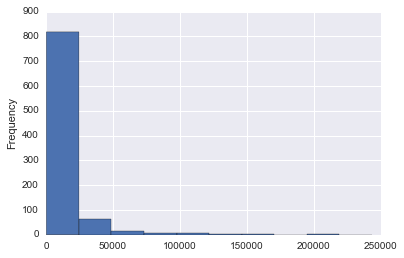

In [229]:
min_theatres.opening_per_theatre.plot.hist()

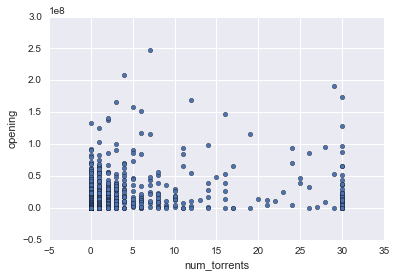

In [230]:
min_theatres.plot.scatter('num_torrents','opening')

In [202]:
import statsmodels.formula.api as sm

In [259]:
model = sm.ols('opening_per_theatre ~ num_torrents + opening_theatres^2 + opening_theatres + genre + month + metascore',data=min_theatres)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     opening_per_theatre   R-squared:                       0.566
Model:                             OLS   Adj. R-squared:                  0.418
Method:                  Least Squares   F-statistic:                     3.835
Date:                 Fri, 29 Apr 2016   Prob (F-statistic):           4.63e-34
Time:                         00:07:24   Log-Likelihood:                -7174.6
No. Observations:                  730   AIC:                         1.472e+04
Df Residuals:                      544   BIC:                         1.558e+04
Df Model:                          185                                         
Covariance Type:             nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------
Intercept                             -7566.9373   5384.584     -1.405      0.161     -1.81e+04  3010.185
genre[T.Action, Adventure]            -4083.1125   7529.427     -0.542      0.588     -1.89e+04  1.07e+04
genre[T.Action, Adventure, Biography] -4442.0948   7473.157     -0.594      0.552     -1.91e+04  1.02e+04
genre[T.Action, Adventure, Comedy]     2794.0906   5673.755      0.492      0.623     -8351.061  1.39e+04
genre[T.Action, Adventure, Crime]      1153.7294   7488.059      0.154      0.878     -1.36e+04  1.59e+04
genre[T.Action, Adventure, Drama]      -606.0943   5492.949     -0.110      0.912     -1.14e+04  1.02e+04
genre[T.Action, Adventure, Family]     -268.8792   5929.767     -0.045      0.964     -1.19e+04  1.14e+04
genre[T.Action, Adventure, Fantasy]    6929.0511   5464.069      1.268      0.205     -3804.206  1.77e+04
genre[T.Action, Adventure, Horror]     4899.7673   6084.571      0.805      0.421     -7052.365  1.69e+04
genre[T.Action, Adventure, Mystery]   -2149.1226   6495.947     -0.331      0.741     -1.49e+04  1.06e+04
genre[T.Action, Adventure, Romance]   -4548.4545   6486.537     -0.701      0.483     -1.73e+04  8193.273
genre[T.Action, Adventure, Sci-Fi]     4014.8767   5404.004      0.743      0.458     -6600.393  1.46e+04
genre[T.Action, Adventure, Thriller]   2881.8866   5706.601      0.505      0.614     -8327.786  1.41e+04
genre[T.Action, Adventure, Western]   -2076.6390   7473.828     -0.278      0.781     -1.68e+04  1.26e+04
genre[T.Action, Comedy]                -743.5985   6092.678     -0.122      0.903     -1.27e+04  1.12e+04
genre[T.Action, Comedy, Crime]         -288.0668   5422.786     -0.053      0.958     -1.09e+04  1.04e+04
genre[T.Action, Comedy, Family]       -3160.0037   6473.360     -0.488      0.626     -1.59e+04  9555.839
genre[T.Action, Comedy, Fantasy]      -2414.7519   6083.260     -0.397      0.692     -1.44e+04  9534.805
genre[T.Action, Comedy, Horror]        2543.1277   7436.852      0.342      0.733     -1.21e+04  1.72e+04
genre[T.Action, Comedy, Mystery]      -2583.4092   7458.604     -0.346      0.729     -1.72e+04  1.21e+04
genre[T.Action, Comedy, Romance]      -2478.6889   5713.706     -0.434      0.665     -1.37e+04  8744.939
genre[T.Action, Comedy, Sci-Fi]       -1612.4650   6089.224     -0.265      0.791     -1.36e+04  1.03e+04
genre[T.Action, Comedy, Sport]         -320.0118   7462.377     -0.043      0.966      -1.5e+04  1.43e+04
genre[T.Action, Crime, Drama]         -2977.6312   5451.003     -0.546      0.585     -1.37e+04  7729.962
genre[T.Action, Crime, Mystery]        -832.9307   5784.637     -0.144      0.886     -1.22e+04  1.05e+04
genre[T.Action, Crime, Romance]       -1199.3790   7451.664     -0.161      0.872     -1.58e+04  1.34e+0